In [ ]:
import sys
import os, requests

# for data analysis
import pandas as pd
import numpy as np
from collections import Counter
import collections


# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.tile_providers import CARTODBPOSITRON, get_provider

from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [76]:
#PREPROCESSING AND READING DATA AS CSV
df = pd.read_csv('/content/drive/My Drive/showwcase_sessions.csv')
df.head()
df = df.dropna(how = 'all') 
df

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0
5,744943.0,73245.0,10/30/19,True,True,True,True,True,3.0,27.0,5.0,1746.0,4.0,1490.0
6,922001.0,12407.0,10/30/19,True,False,True,False,False,5.0,0.0,5.0,0.0,0.0,1329.0
7,823895.0,29375.0,10/30/19,False,False,True,True,False,0.0,0.0,5.0,2474.0,0.0,1875.0
8,490096.0,40572.0,10/30/19,True,True,False,False,False,1.0,25.0,0.0,0.0,0.0,290.0
9,919319.0,23404.0,10/29/19,True,True,False,True,False,2.0,14.0,0.0,2031.0,0.0,1957.0


In [ ]:
#FREQUENCY USING CUSTOMER ID
arr = []
for row in df['customer_id']:
  if row != '':
    arr.append(row)
freq = {} 
for item in arr:
  if (item in freq):
    freq[item] += 1
  else: 
    freq[item] = 1
  
for key, value in freq.items():
  print ("%d : %d"%(key, value)) 

#SORTED IN ASCENDING ORDER
print('\n\nAscending Order\n')
for key in sorted(freq.keys()):
    print("%s : %s" % (key, freq[key]))

 

80746 : 4
24520 : 2
32047 : 4
23404 : 21
40235 : 17
73245 : 15
12407 : 8
29375 : 22
40572 : 16
98653 : 6
87323 : 17
51243 : 12
23083 : 11
38459 : 18
23985 : 8
73524 : 8
14354 : 15
43549 : 7
39475 : 4
12496 : 6
43057 : 6
87265 : 12
96254 : 7
34574 : 7
29356 : 6
10246 : 4
33496 : 1
46329 : 1
29345 : 1
19374 : 1
23579 : 5
23596 : 1
23457 : 1
12940 : 5
43086 : 5
98476 : 1
93464 : 4
23548 : 1
93486 : 1
98346 : 1
19348 : 1
76530 : 1
92736 : 1
20548 : 1
68754 : 1
82963 : 1
43658 : 1
43096 : 1


Ascending Order

10246.0 : 4
12407.0 : 8
12496.0 : 6
12940.0 : 5
14354.0 : 15
19348.0 : 1
19374.0 : 1
20548.0 : 1
23083.0 : 11
23404.0 : 21
23457.0 : 1
23548.0 : 1
23579.0 : 5
23596.0 : 1
23985.0 : 8
24520.0 : 2
29345.0 : 1
29356.0 : 6
29375.0 : 22
32047.0 : 4
33496.0 : 1
34574.0 : 7
38459.0 : 18
39475.0 : 4
40235.0 : 17
40572.0 : 16
43057.0 : 6
43086.0 : 5
43096.0 : 1
43549.0 : 7
43658.0 : 1
46329.0 : 1
51243.0 : 12
68754.0 : 1
73245.0 : 15
73524.0 : 8
76530.0 : 1
80746.0 : 4
82963.0 : 1
87265.0 : 12


**Accounting for each individual user is impractical, however, accounting for recurring users allows for better assessment of user engagement. Below I am removing rows where particular users only visited have a single recorded session. Clearly, the users who've only logged in once for a session express no interest so it is important to analyze the trends in users who've have logged in more than once to see how those patterns can be replicated to appeal to more users.**

In [108]:
df['row_num'] = np.arange(len(df))

rows = []
for row in df['row_num']:
  rows.append(row)

session_id = []
for id in df['session_id']:
  session_id.append(id)
row_id_pair = dict(zip(session_id, rows))

delete = []
for x in freq:
  if freq[x] == 1:
    delete.append(x)

df = df.drop([df.index[290], df.index[291], df.index[293]])
df = df.drop([df.index[245], df.index[251], df.index[266]])
df = df.drop([df.index[240], df.index[241], df.index[243]])
df = df.drop([df.index[166], df.index[232], df.index[234]])
df = df.drop([df.index[140], df.index[153], df.index[156]])
df = df.drop([df.index[95] , df.index[137], df.index[139]])
df

(300, 15)


,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,row_num
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0,0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0,1
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0,2
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0,3
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0,4
5,744943.0,73245.0,10/30/19,True,True,True,True,True,3.0,27.0,5.0,1746.0,4.0,1490.0,5
6,922001.0,12407.0,10/30/19,True,False,True,False,False,5.0,0.0,5.0,0.0,0.0,1329.0,6
7,823895.0,29375.0,10/30/19,False,False,True,True,False,0.0,0.0,5.0,2474.0,0.0,1875.0,7
8,490096.0,40572.0,10/30/19,True,True,False,False,False,1.0,25.0,0.0,0.0,0.0,290.0,8
9,919319.0,23404.0,10/29/19,True,True,False,True,False,2.0,14.0,0.0,2031.0,0.0,1957.0,9


**The data collected below is to develop an idea of the range for session duration to subsequently answer what prompted that amount of time.**

In [ ]:
#MAXIMUM, MINIMUM, AND MAD VALUES FOR SESSION DURATION
arr = []
for row in df['session_duration']:
  if row != '':
    arr.append(row)
print(max(arr))
print(min(arr))

series = pd.Series(arr) 
mad = series.mad()
print(mad)

2395
10
590.5573777777779


**Identifying the correlation between the number of bugs occurred and user activity. For the most part there very few bugs.**

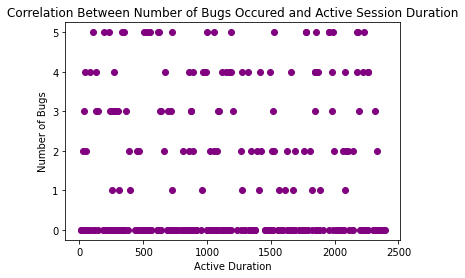

In [ ]:
#CORRELATION BETWEEN ACTIVE DURATION AND BUGS OCCURRED
bugs_occured = []
inactive_duration = []
for row in df['bugs_in_session']:
  if row != '':
    bugs_occured.append(row)

for row in df['session_duration']:
  if row != '':
    inactive_duration.append(row)
# x axis values 
x = inactive_duration
# corresponding y axis values 
y = bugs_occured
  
# plotting the points  
plt.scatter(x, y, color = 'purple', marker = 'o')
  
# naming the x axis 
plt.xlabel('Active Duration') 
# naming the y axis 
plt.ylabel('Number of Bugs') 
  
# giving a title to my graph 
plt.title('Correlation Between Number of Bugs Occured and Active Session Duration') 
  
# function to show the plot 
plt.show()

**Grouping certain data for accurate understanding.**

In [ ]:
df_a=df.groupby(['customer_id'])['projects_added'].count().reset_index(name="total_reactions_per_customer")
df_a.tail()

,customer_id,total_reactions_per_customer
44,96254,7
45,98346,1
46,98476,1
47,98653,6
48,,2


**Pie charts depicting relation to various modes of engagement(likes, comments, and projects).**

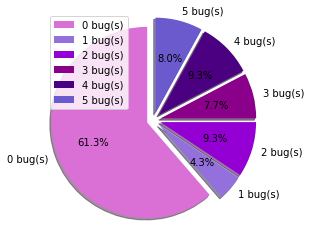

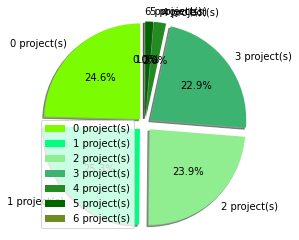

In [ ]:
#NUMBER OF BUGS
# defining labels 
activities = ['0 bug(s)', '1 bug(s)', '2 bug(s)', '3 bug(s)', '4 bug(s)', '5 bug(s)'] 

zero = 0
one = 0
two = 0
three = 0
four = 0
five = 0
for val in df['bugs_in_session']:
  if val == 0:
    zero += 1
  elif val == 1:
    one += 1
  elif val == 2:
    two += 1
  elif val == 3:
    three += 1
  elif val == 4:
    four += 1
  elif val == 5:
    five += 1

# portion covered by each label 
slices = [zero, one, two, three, four, five] 
  
# color for each label 
colors = ['#DA70D6', '#9370DB', '#9400D3', '#8B008B', '#4B0082', '#6A5ACD'] 
  
# plotting the pie chart 
plt.pie(slices, labels = activities, colors=colors,  
        startangle=90, shadow = True, explode = (0.08, 0.08, 0.08, 0.08, 0.08, 0.08), 
        radius = 1.1, autopct = '%1.1f%%') 
  
# plotting legend 
plt.legend() 
  
# showing the plot 
plt.show() 

#NUMBER OF PROJECTS
# defining labels 
activities = ['0 project(s)', '1 project(s)', '2 project(s)', '3 project(s)', '4 project(s)', '5 project(s)', '6 project(s)'] 

zero = 0
one = 0
two = 0
three = 0
four = 0
five = 0
six = 0
for val in df['session_projects_added']:
  if val == 0:
    zero += 1
  elif val == 1:
    one += 1
  elif val == 2:
    two += 1
  elif val == 3:
    three += 1
  elif val == 4:
    four += 1
  elif val == 5:
    five += 1
  elif val == 5:
    six += 1

# portion covered by each label 
slices = [zero, one, two, three, four, five, six] 
  
# color for each label 
colors = ['#7CFC00', '#00FF7F', '#90EE90', '#3CB371', '#228B22', '#006400', '#6B8E23'] 
  
# plotting the pie chart 
plt.pie(slices, labels = activities, colors=colors,  
        startangle=90, shadow = True, explode = (0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08), 
        radius = 1.1, autopct = '%1.1f%%') 
  
# plotting legend 
plt.legend() 
  
# showing the plot 
plt.show()

**Calculating the number of sessions happening each day and how the frequency of each user is relative to their engagement.**

In [140]:


#NUMBER OF SESSIONS PER DAY OF THE MONTH

from collections import Counter
import collections
login_date = []
for date in df['login_date']:
  if date != '':
    login_date.append(date)


date_freq = {'10/30/19' : 1} 
for item in login_date:
  if (item in date_freq):
    date_freq[item] += 1
  else: 
    date_freq[item] = 1
  
print(date_freq)

#QUANTITY OF TRUE AND FALSE VALUES FOR EVERY DAY OF THE MONTH FOR INACTIVE STATUS
session_true = []
session_false = []
x = 0
for q in date_freq.values():
  f = 0
  t = 0
  for val in df['inactive_status']:
    if val == 'FALSE' and x < q:
      f += 1
    elif val == 'TRUE' and x < q:
      t += 1
    else:
      x = 0
      break
    x += 1
  session_true.append(t)
  session_false.append(f)

{'10/30/19': 1, Timestamp('2019-10-30 00:00:00'): 9, Timestamp('2019-10-29 00:00:00'): 7, Timestamp('2019-10-28 00:00:00'): 10, Timestamp('2019-10-27 00:00:00'): 7, Timestamp('2019-10-26 00:00:00'): 22, Timestamp('2019-10-25 00:00:00'): 6, Timestamp('2019-10-24 00:00:00'): 12, Timestamp('2019-10-23 00:00:00'): 4, Timestamp('2019-10-22 00:00:00'): 11, Timestamp('2019-10-21 00:00:00'): 14, Timestamp('2019-10-20 00:00:00'): 12, Timestamp('2019-10-19 00:00:00'): 11, Timestamp('2019-10-18 00:00:00'): 11, Timestamp('2019-10-17 00:00:00'): 2, Timestamp('2019-10-16 00:00:00'): 4, Timestamp('2019-10-15 00:00:00'): 12, Timestamp('2019-10-14 00:00:00'): 3, Timestamp('2019-10-13 00:00:00'): 10, Timestamp('2019-10-12 00:00:00'): 8, Timestamp('2019-10-11 00:00:00'): 14, Timestamp('2019-10-10 00:00:00'): 14, Timestamp('2019-10-09 00:00:00'): 10, Timestamp('2019-10-08 00:00:00'): 8, Timestamp('2019-10-07 00:00:00'): 10, Timestamp('2019-10-06 00:00:00'): 8, Timestamp('2019-10-05 00:00:00'): 13, Timesta

**Trends and patterns between the number of users per day (calculated above) and the respective date.**

[(0.0, 25.0), Text(0, 0.5, 'Number of Users'), Text(0.5, 0, 'Date'), None]

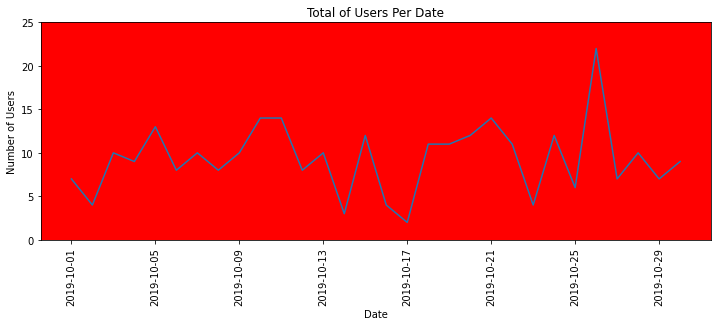

In [141]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
plt.title("Total of Users Per Date")
df['login_date'] = pd.to_datetime(df['login_date'])
data = pd.DataFrame(df['login_date'].value_counts())
x = data.index
y = data['login_date']
sns.lineplot(x, y).set(ylabel="Number of Users",xlabel="Date", facecolor='r', ylim=(0,25))


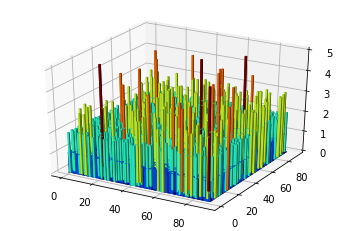

In [ ]:
#EXPERIMENTING NEW AND ALTERNATIVE WAYS OF MODELING
import numpy as np
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

samples = np.random.randint(91,size=(5000,2))

F = np.zeros([91,91])
for s in samples:
    F[s[0],s[1]] += 1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_data, y_data = np.meshgrid( np.arange(F.shape[1]),
                              np.arange(F.shape[0]) )
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = F.flatten()

dz = F
offset = dz + np.abs(dz.min())
fracs = offset.astype(float)/offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
colors = cm.jet(norm(fracs))

ax.bar3d(x_data,y_data,np.zeros(len(z_data)),1,1,z_data,color=colors.reshape(-1,4) )
plt.show()